## Question #1 Elevation - Analysis

### Does training elevation relate to running performance?

* Null hypothesis:  If elevation is not related to running performance, then runners from a city with a higher elevation than the marathon location would not result in a shorter finishing time.

* Alternate hypothesis: If elevation is related to running performance, then runners from a city with a higher elevation that the marathon location would result in a shorter finishing time.


### Findings:
* A linear regression was created to show the elevation of the runners' resident cities and their finishing times.  The correlation coefficient is low for the linear regression.  The data could still be related, not necessarily in a line.  The scatter plot does show a greater number of runners from higher elevations grouped towards the first half of finishing times.
* One of the histograms created shows the means of two groups: those from elevations above Boston (where the marathon took place) and those from elevations below Boston. Even though the means appear to be close on the chart, the P value is very low. This suggests there is significance in the difference of means and that the null hypothesis should be rejected.  
* Another histogram was created to compare the means of two other groups: those from elevations over 1500 meters (considered high elevation) and those from elevations below 1500 meters.  The P value was also very low, lending more evidence to reject the null hypothersis and consider that elevation and running performance are related.

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import datetime

# Google API Key
from config import g_key

In [2]:
# create dataframe from cleaned data
elevation_df = pd.read_csv("output/2019boston_marathon_elevation.csv")
elevation_df.head()

,Unnamed: 0,BibNumber,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,CountryOfResAbbrev,CountryOfResName,OfficialTime,RankOverall,RankOverGender,Address,Lat_x,Lng_x,Coordinates,Elevation
0,0,2,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,KEN,Kenya,2:07:57,1,1,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340
1,1,6,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,ETH,Ethiopia,2:07:59,2,2,"Ambo, Ethiopia",8.958061,37.932101,"8.9580605, 37.9321008",2376.239258
2,2,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,NaN,KEN,Kenya,2:08:07,3,3,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340
3,3,8,"Kandie, Felix",32,M,Iten,NaN,NaN,KEN,Kenya,2:08:54,4,4,"Iten, Kenya",0.673235,35.508314,"0.6732353999999999, 35.5083136",2358.822510
4,4,11,"Kirui, Geoffrey",26,M,Keringet,NaN,NaN,KEN,Kenya,2:08:55,5,5,"Keringet, Kenya",-0.469779,36.000324,"-0.4697789, 36.0003237",2272.979492


In [3]:
# create lists of data
time_data = elevation_df["OfficialTime"]
elevation_data = elevation_df["Elevation"]


In [4]:
# convert strings of time to timsestamps
times = [pd.to_datetime(time, format ="%H:%M:%S", 
                     errors ="coerce") for time in time_data] 


In [5]:
# testing
max_time = max(times)
min_time = min(times)
print(max_time)
print(min_time)
print(max_time-min_time)
print(times[0])

1900-01-01 06:35:50
1900-01-01 02:07:57
0 days 04:27:53
1900-01-01 02:07:57


In [6]:
# testing
time_string = time_data[0]

date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")

print(date_time)

a_timedelta = date_time - datetime.datetime(1900, 1, 1)
seconds = a_timedelta.total_seconds()

print(seconds)

1900-01-01 02:07:57
7677.0


In [7]:
# create list of finishing times in seconds
seconds = []

for time in time_data:
    date_time = datetime.datetime.strptime(time, "%H:%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    num_seconds = a_timedelta.total_seconds()
    seconds.append(num_seconds)


In [8]:
# add seconds to dataframe
elevation_df["Seconds"] = seconds
elevation_df

,Unnamed: 0,BibNumber,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,CountryOfResAbbrev,CountryOfResName,OfficialTime,RankOverall,RankOverGender,Address,Lat_x,Lng_x,Coordinates,Elevation,Seconds
0,0,2,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,KEN,Kenya,2:07:57,1,1,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340,7677.0
1,1,6,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,ETH,Ethiopia,2:07:59,2,2,"Ambo, Ethiopia",8.958061,37.932101,"8.9580605, 37.9321008",2376.239258,7679.0
2,2,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,NaN,KEN,Kenya,2:08:07,3,3,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340,7687.0
3,3,8,"Kandie, Felix",32,M,Iten,NaN,NaN,KEN,Kenya,2:08:54,4,4,"Iten, Kenya",0.673235,35.508314,"0.6732353999999999, 35.5083136",2358.822510,7734.0
4,4,11,"Kirui, Geoffrey",26,M,Keringet,NaN,NaN,KEN,Kenya,2:08:55,5,5,"Keringet, Kenya",-0.469779,36.000324,"-0.4697789, 36.0003237",2272.979492,7735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,30798,"Shubert, Mackenzie",28,F,Malden,MA,Massachusetts,USA,United States of America,6:16:56,26636,11975,"Malden, MA",42.425096,-71.066163,"42.4250964, -71.066163",3.172937,22616.0
26513,26513,25235,"Mcsweeney, Nikki",33,F,Natick,MA,Massachusetts,USA,United States of America,6:18:13,26637,11976,"Natick, MA",42.277528,-71.346809,"42.2775281, -71.3468091",51.877419,22693.0
26514,26514,25616,"Genest, Debbie",44,F,Harrisville,RI,Rhode Island,USA,United States of America,6:21:19,26640,11977,"Harrisville, RI",41.965654,-71.674511,"41.96565390000001, -71.6745112",97.678200,22879.0
26515,26515,23316,"Lewandowski, Denise",50,F,Boiling Springs,PA,Pennsylvania,USA,United States of America,6:22:27,26641,11978,"Boiling Springs, PA",40.149812,-77.128313,"40.14981239999999, -77.1283133",147.602921,22947.0


In [9]:
# create time (in seconds) data to use for plot
second_data = elevation_df["Seconds"]

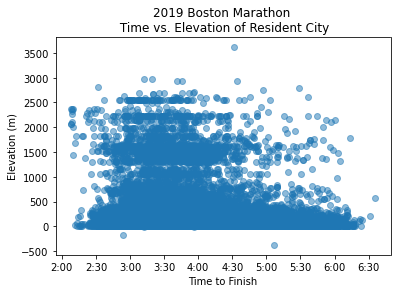

In [10]:
# create scatter plot **this one uses datetime
plt.scatter(times, elevation_data, marker="o", alpha=0.5)
plt.title(f"2019 Boston Marathon \n Time vs. Elevation of Resident City")
plt.xlabel("Time to Finish")
plt.ylabel("Elevation (m)")
locs, labels = plt.xticks()
plt.xticks(locs, ["2:00","2:30","3:00","3:30","4:00","4:30","5:00","5:30","6:00","6:30"])
plt.show()

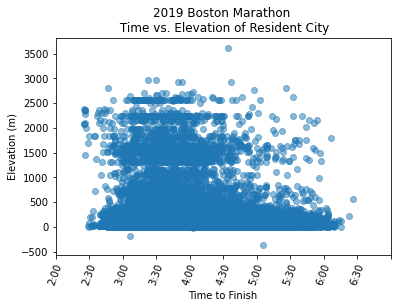

In [11]:
# create scatter plot **this one uses seconds
plt.scatter(second_data, elevation_data, marker="o", alpha=0.5)
plt.title(f"2019 Boston Marathon \n Time vs. Elevation of Resident City")
plt.xlabel("Time to Finish")
plt.ylabel("Elevation (m)")
locs, labels = plt.xticks()
plt.xticks(locs, ["2:00","2:30","3:00","3:30","4:00","4:30","5:00","5:30","6:00","6:30"], rotation=70)
plt.show()

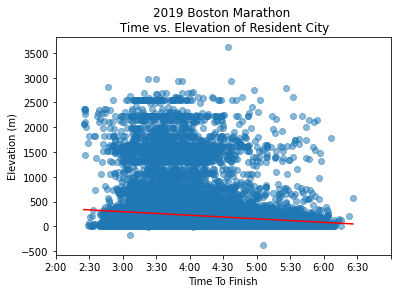

Linear Regression Model: y = -0.02x + 474.34
The correlation coefficient is -0.12


In [23]:
# create plot with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(second_data, elevation_data)
regress_values = second_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(second_data, elevation_data, marker="o", alpha=0.5)
plt.plot(second_data, regress_values, "r-")
plt.title(f"2019 Boston Marathon \n Time vs. Elevation of Resident City")
plt.xlabel("Time To Finish")
plt.ylabel("Elevation (m)")
locs, labels = plt.xticks()
plt.xticks(locs, ["2:00","2:30","3:00","3:30","4:00","4:30","5:00","5:30","6:00","6:30"])
plt.savefig("output/plot_elevation_regression.png")
plt.show()

correlation = st.pearsonr(elevation_data, second_data)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")

In [13]:
# get basic stats
mean_numpy = str(datetime.timedelta(seconds=(np.mean(second_data))))
print(f"The mean finishing time is {mean_numpy}")

median_numpy = str(datetime.timedelta(seconds=(np.median(second_data))))
print(f"The median finishing time is {median_numpy}")

mode_scipy = st.mode(second_data)
print(f"The mode finishing time is {mode_scipy}")

The mean finishing time is 3:52:47.284346
The median finishing time is 3:45:26
The mode finishing time is ModeResult(mode=array([13759.]), count=array([13]))


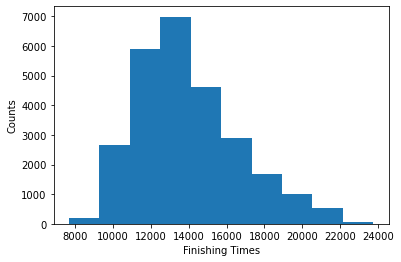

NormaltestResult(statistic=14.757707514574047, pvalue=0.00062431609379338)


In [14]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(second_data)
plt.xlabel('Finishing Times')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(second_data.sample(50)))

In [15]:
# divide data frame into high altitudes & normal altitudes
high_altitude_df = elevation_df.loc[elevation_df["Elevation"] >= 1500]
normal_altitude_df = elevation_df.loc[elevation_df["Elevation"] < 1500]
print(len(high_altitude_df))
print(len(normal_altitude_df))

1054
25463


In [16]:
# create data for times
high_sec_data = high_altitude_df["Seconds"]
norm_sec_data = normal_altitude_df["Seconds"]
all_sec_data = elevation_df["Seconds"]

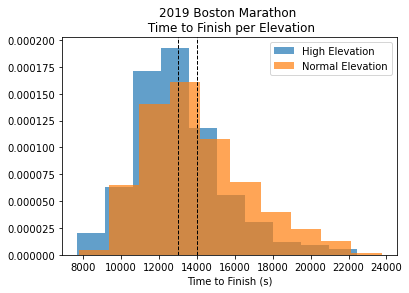

In [17]:
# create plot for high altitude times and normal altitude times
plt.hist(high_sec_data, 10, density=True, alpha=0.7, label="High Elevation")
plt.hist(norm_sec_data, 10, density=True, alpha=0.7, label="Normal Elevation")
plt.axvline(high_sec_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(norm_sec_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f"2019 Boston Marathon \n Time to Finish per Elevation")
plt.xlabel("Time to Finish (s)")
plt.legend() 
plt.savefig("output/plot_elevation_histogram_1500.png")

In [18]:
st.ttest_ind(high_sec_data, norm_sec_data, equal_var=False)

Ttest_indResult(statistic=-13.330323147836811, pvalue=7.710634758602041e-38)

In [19]:
# divide data frame into altitudes higher & lower than Boston
boston_low_elevation_df = elevation_df.loc[elevation_df["Elevation"] <= 43]
boston_high_elevation_df = elevation_df.loc[elevation_df["Elevation"] > 43]
print(len(boston_low_elevation_df))
print(len(boston_high_elevation_df))

10904
15613


In [20]:
# create data for times
b_low_sec_data = boston_low_elevation_df["Seconds"]
b_high_sec_data = boston_high_elevation_df["Seconds"]

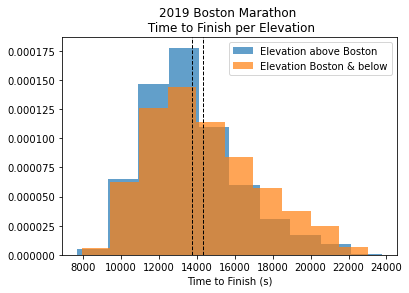

In [21]:
# create plot for times for elevations below Boston and elevations above Boston
plt.hist(b_high_sec_data, 10, density=True, alpha=0.7, label="Elevation above Boston")
plt.hist(b_low_sec_data, 10, density=True, alpha=0.7, label="Elevation Boston & below")
plt.axvline(b_high_sec_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(b_low_sec_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f"2019 Boston Marathon \n Time to Finish per Elevation")
plt.xlabel("Time to Finish (s)")
plt.legend()
plt.savefig("output/plot_elevation_histogram_boston.png")

In [22]:
st.ttest_ind(b_high_sec_data, b_low_sec_data, equal_var=False)

Ttest_indResult(statistic=-18.361153210514047, pvalue=1.0119927170206424e-74)